In [326]:
import random
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [327]:
def RandomPermutation():  
    perm = list(range(8))  
    random.shuffle(perm)  
    return perm  
 
def StupidPermutation():  
    partialSums = [0,1,8,35,111,285,
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]  
    r = random.randint(0, partialSums[-1])
    numInv = 0
    while partialSums[numInv] < r:
        numInv += 1
    perm = list(range(8))
    for step in range(numInv):
        t1 = random.randint(0, 7) 
        t2 = random.randint(0, 7)  
        perm[t1], perm[t2] = perm[t2], perm[t1]  
    return perm

In [22]:
# load test data 
with open('permutations.in') as fin:
    n = int(fin.readline().strip())
    i = 1
    data = []
    block = []
    while i < 1000  * n + 1:
        perm = list(map(int, fin.readline().strip().split()))
        block.append(perm)
        if i % 1000 == 0:
            data.append(block)
            block = []
        i += 1

In [45]:
test = np.array(data)
test.shape

(200, 1000, 8)

In [37]:
# generating train data ~1min
train = []
for i in range(1000000):
    train.append(RandomPermutation())
for i in range(1000000):
    train.append(StupidPermutation())
    
labels = [0] * int(1e6) + [1] * int(1e6)
X = np.array(train)
y = np.array(labels)

X_blocks = X.reshape(-1, 1000, 8)
y_blocks = np.array([0] * 1000 + [1] * 1000)

In [328]:
X_blocks.shape

(2000, 1000, 8)

In [329]:
def count_num_in_pos(block):
    """ return sum of i number in i position """
    s = 0
    for i in range(8):
        s += (block[:, i] == i).sum()
    return s

fe_nums_in_pos = np.zeros(2000)
for i, block in enumerate(X_blocks):
    fe_nums_in_pos[i] = count_num_in_pos(block)

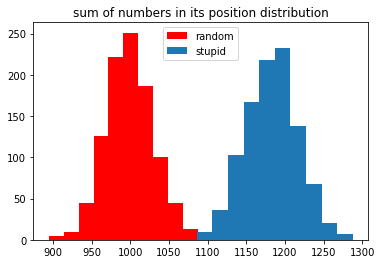

In [342]:
plt.hist(fe_nums_in_pos[:1000], color='red', label="random")
plt.hist(fe_nums_in_pos[1000:], label="stupid")
plt.title("sum of numbers in its position distribution")
plt.legend();

In [331]:
print("random: {:.4f} +- {:.4f}".format(fe_nums_in_pos[:1000].mean(), 3*fe_nums_in_pos[:1000].std()))
print("stupid: {:.4f} +- {:.4f}".format(fe_nums_in_pos[1000:].mean(), 3*fe_nums_in_pos[1000:].std()))
((fe_nums_in_pos > 1080) == y_blocks).sum()

random: 999.0310 +- 91.5807
stupid: 1182.9230 +- 101.3881


1997

In [332]:
fe_nums_in_pos[:1000].mean() + 3*fe_nums_in_pos[:1000].std(), fe_nums_in_pos[1000:].mean() - 3*fe_nums_in_pos[1000:].std()

(1090.6117204110121, 1081.5349354213722)

In [333]:
# predict test 
random_tests = []
stupid_tests = []
nums_in_pos = np.zeros(200)

for i, block in enumerate(test):
    pred_nums = count_num_in_pos(block)
    nums_in_pos[i] = pred_nums
    if pred_nums > 1085:
        stupid_tests.append(i)
    else:
        random_tests.append(i)

out = random_tests + stupid_tests

fout = open("answer.txt", "w")
for i in out[:-1]:
    fout.write(str(i)+'\n')
fout.write(str(out[-1]))
fout.close()

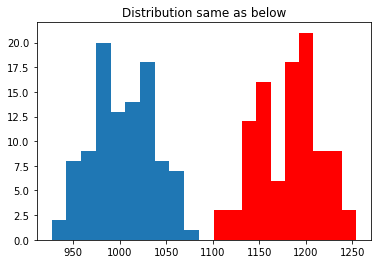

In [345]:
plt.hist(nums_in_pos[nums_in_pos>1085], color='red')
plt.hist(nums_in_pos[nums_in_pos<=1085])
plt.title("Distribution same as below")